# 1. 강의영상 

{{<video ??? >}}

# 2. Imports 

In [12]:
#!pip install autogluon.eda

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
#---#
from autogluon.tabular import TabularPredictor
import autogluon.eda.auto as auto
#---#
import warnings
warnings.filterwarnings('ignore')

# 3. Data 

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/height_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/height_test.csv')

In [4]:
df_train.head()

,weight,sex,height
0,71.169041,male,180.906857
1,69.204748,male,178.123281
2,49.037293,female,165.106085
3,74.472874,male,177.467439
4,74.239599,male,177.439925


`-` 중간고사 문제였죠?

`-` 자료컨셉 

- 성별간 교호작용 존재
- 결측치 존재 (성별로 결측치를 처리해야 좋았음) 

<AxesSubplot: xlabel='weight', ylabel='height'>

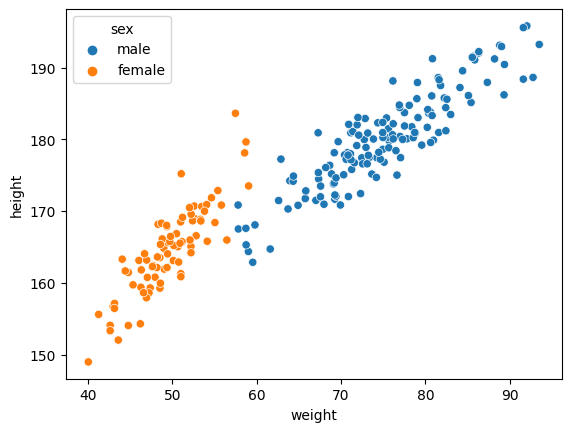

In [7]:
sns.scatterplot(df_train, x='weight',y='height',hue='sex')

# 4. 적합

In [8]:
# step1 -- pass
# step2 
predictr = TabularPredictor(label='height')
# step3 
predictr.fit(df_train) 
# step4 
yhat = predictr.predict(df_train)

No path specified. Models will be saved in: "AutogluonModels/ag-20231201_095220/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231201_095220/"
AutoGluon Version:  0.8.2
Python Version:     3.10.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #26~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Thu Jul 13 16:27:29 UTC 2
Disk Space Avail:   248.45 GB / 490.57 GB (50.6%)
Train Data Rows:    280
Train Data Columns: 2
Label Column: height
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (195.79716947992372, 148.97529810482766, 174.60543, 9.4301)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the da

[1000]	valid_set's rmse: 3.05149


	-3.1331	 = Validation score   (-root_mean_squared_error)
	0.3s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-3.0811	 = Validation score   (-root_mean_squared_error)
	0.27s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: CatBoost ...
	-2.8341	 = Validation score   (-root_mean_squared_error)
	0.37s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-3.0481	 = Validation score   (-root_mean_squared_error)
	0.39s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-3.0808	 = Validation score   (-root_mean_squared_error)
	2.23s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: XGBoost ...
	-3.0563	 = Validation score   (-root_mean_squared_error)
	0.16s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-2.8592	 = Validation score   (-root_mean_squared_error)
	2.49s	 = Training   runtime
	0.0s	 = Validation runtime
F

<AxesSubplot: xlabel='weight', ylabel='height'>

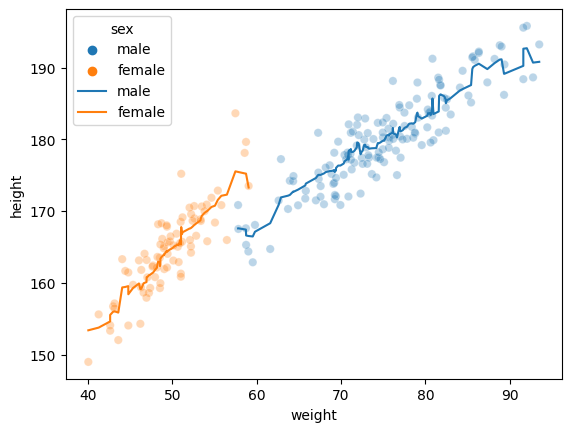

In [10]:
sns.scatterplot(df_train, x='weight',y='height',hue='sex',alpha=0.3)
sns.lineplot(df_train, x='weight',y=yhat,hue='sex')

In [11]:
predictr.leaderboard(silent=True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-2.725900,0.030083,5.460742,0.000256,0.193579,2,True,12
1,CatBoost,-2.834127,0.000847,0.371781,0.000847,0.371781,1,True,6
2,NeuralNetTorch,-2.859244,0.003287,2.488698,0.003287,2.488698,1,True,10
3,LightGBMXT,-3.034869,0.001212,0.553330,0.001212,0.553330,1,True,3
4,ExtraTreesMSE,-3.048093,0.120210,0.387424,0.120210,0.387424,1,True,7
5,XGBoost,-3.056270,0.002181,0.162659,0.002181,0.162659,1,True,9
6,NeuralNetFastAI,-3.080801,0.008601,2.234955,0.008601,2.234955,1,True,8
7,RandomForestMSE,-3.081138,0.119838,0.269562,0.119838,0.269562,1,True,5
8,LightGBM,-3.133082,0.000696,0.304734,0.000696,0.304734,1,True,4
9,LightGBMLarge,-3.175914,0.000813,0.384626,0.000813,0.384626,1,True,11


# 5. 해석 및 시각화

## A. y의 분포, (X,y)의 관계 시각화 

## Target variable analysis

,count,mean,std,min,25%,50%,75%,max,dtypes,unique,missing_count,missing_ratio,raw_type,special_types
height,280,174.605431,9.430102,148.975298,167.572671,175.186487,181.132612,195.797169,float64,280,,,float,


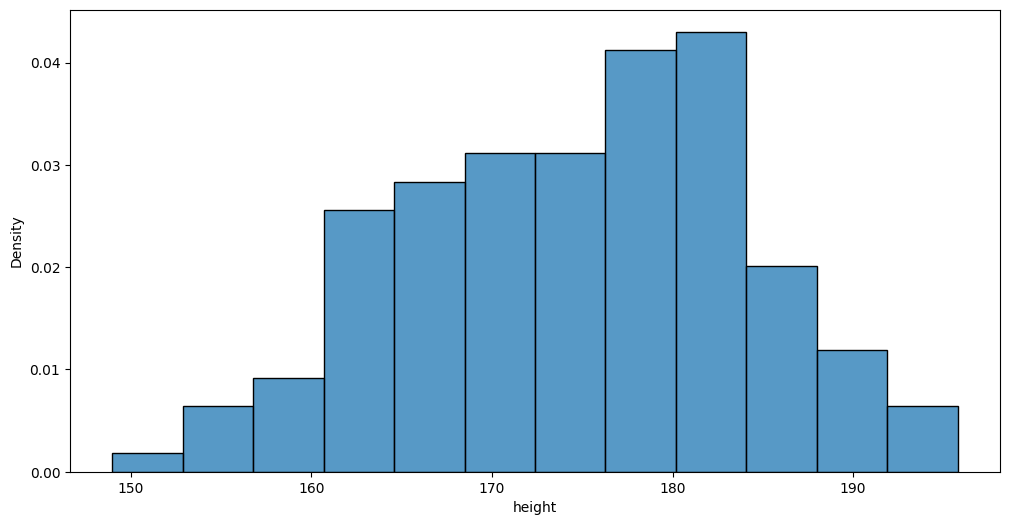

### Target variable correlations

**`train_data` - `spearman` correlation matrix; focus: absolute correlation for `height` >= `0.5`**

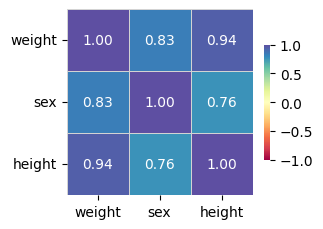

**Feature interaction between `weight`/`height` in `train_data`**

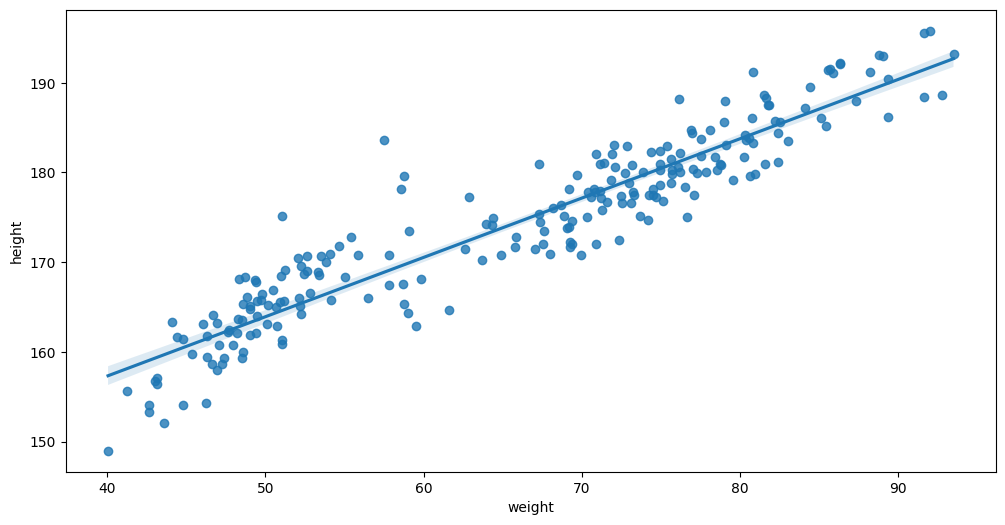

**Feature interaction between `sex`/`height` in `train_data`**

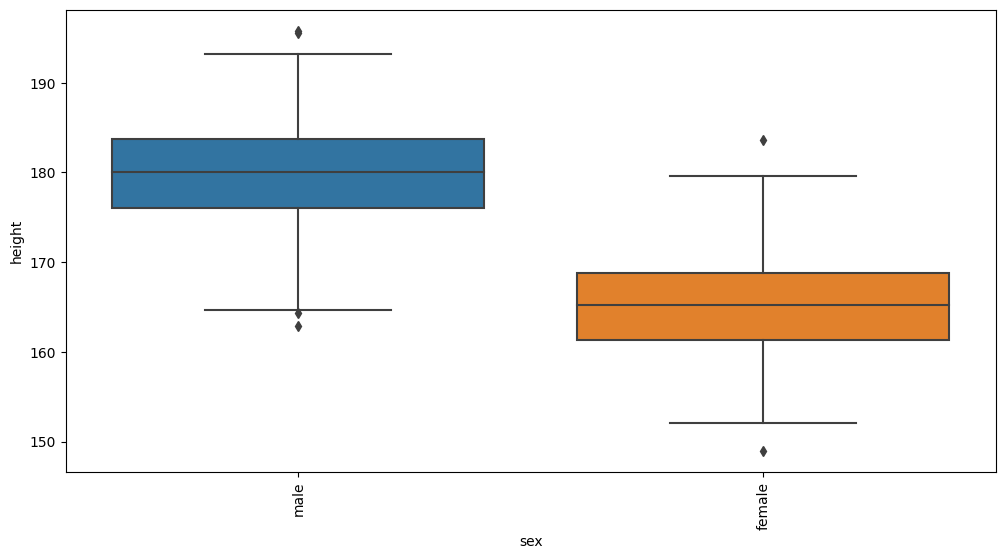

In [15]:
auto.target_analysis(
    train_data=df_train,
    label='height',
    fit_distributions=False
)

## B. 중요한 설명변수?

No path specified. Models will be saved in: "AutogluonModels/ag-20231201_095928/"


### Model Prediction for height

Using validation data for `Test` points

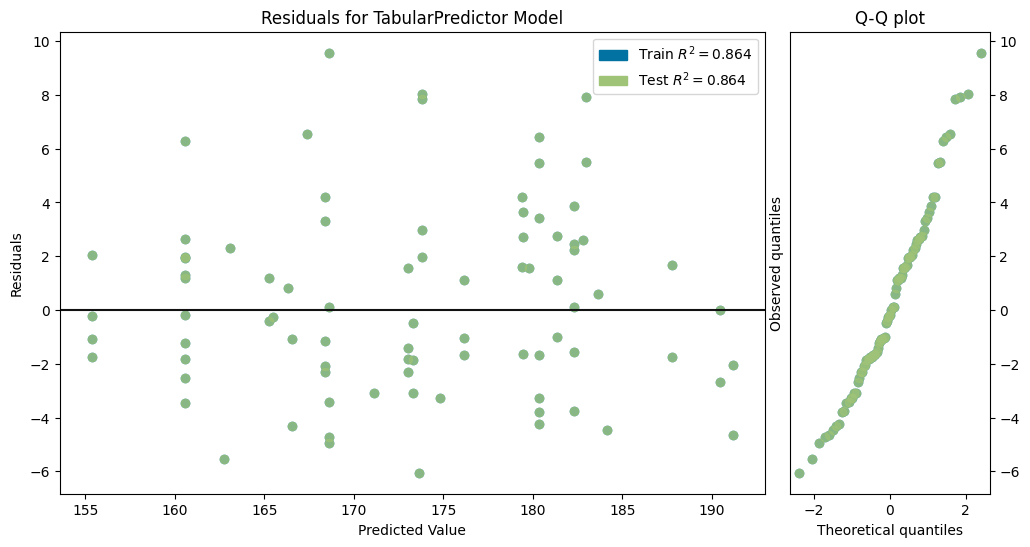

### Model Leaderboard

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT,-3.441217,-3.881789,0.006186,0.001353,0.514913,0.006186,0.001353,0.514913,1,True,1


### Feature Importance for Trained Model

,importance,stddev,p_value,n,p99_high,p99_low
weight,9.433162,0.468715,7.290537e-07,5,10.398253,8.468071
sex,1.710680,0.464422,5.924364e-04,5,2.666932,0.754427


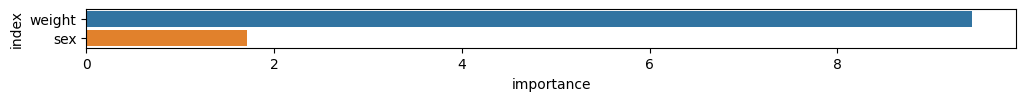

### Rows with the highest prediction error

Rows in this category worth inspecting for the causes of the error

,weight,sex,height,height_pred,error
208,NaN,female,159.027430,168.600342,9.572911
263,54.145913,female,165.791300,173.811340,8.020041
146,76.642564,male,175.011295,182.954391,7.943097
228,56.473758,female,165.962051,173.811340,7.849289
92,51.018586,female,160.851952,167.398270,6.546318
198,NaN,male,173.915293,180.355164,6.439870
157,46.214566,female,154.289882,160.576065,6.286183
106,69.667856,male,179.665916,173.611328,6.054588
118,48.711791,female,168.305739,162.763138,5.542602
166,77.068343,male,177.439194,182.954391,5.515197


In [19]:
auto.quick_fit(
    train_data=df_train,
    label='height',
    show_feature_importance_barplots=True
)

## C. 관측치별 해석 

### 0번 obs

`-` 0번 observation

In [24]:
df_train.iloc[[0]]

,weight,sex,height
0,71.169041,male,180.906857


In [25]:
predictr.predict(df_train.iloc[[0]])

0    178.642868
Name: height, dtype: float32

- 왜 178.642868로 예측했을까? 

`-` 해석 

,weight,sex,height
0,71.169041,male,180.906857


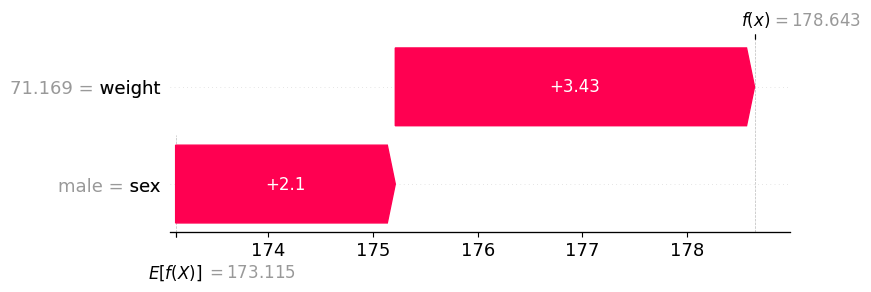

In [32]:
auto.explain_rows(
    train_data= df_train,
    model = predictr,
    rows = df_train.iloc[[0]],
    display_rows= True,
    plot='waterfall'
)

- 왜 178.642868로 예측했을까? 
- 일단은 평균값인 173.115에 적합
- `sex`을 고려하여 +2.1
- `weight`을 고려하여 +3.77
- 최종적으로는 178.643

### 208번 obs

`-` 208번 observation

In [33]:
df_train.iloc[[208]]

,weight,sex,height
208,NaN,female,159.02743


In [34]:
predictr.predict(df_train.iloc[[208]])

208    168.788971
Name: height, dtype: float32

- 왜 168.788971로 예측했을까? 

`-` 해석 

,weight,sex,height
208,NaN,female,159.02743


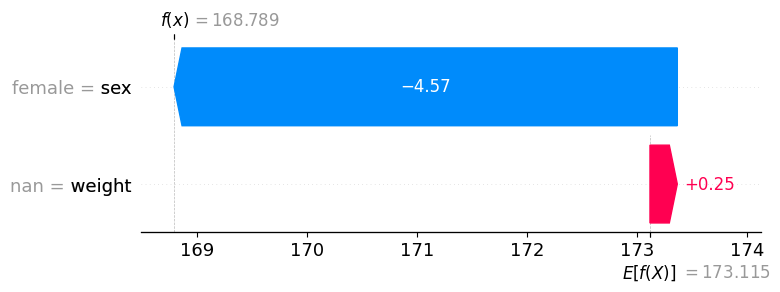

In [36]:
auto.explain_rows(
    train_data= df_train,
    model = predictr,
    rows=df_train.iloc[[208]],
    display_rows= True,
    plot='waterfall'
)

- 왜 178.642868로 예측했을까? 
- 일단은 평균값인 173.115에 적합
- `sex`을 고려하여 -4.57
- `weight=nan`을 고려하여 +0.25
- 최종적으로는 168.789

> 결측치를 그냥 하나의 관측치로 해석함 (nan이라는 값을 가지고 있다고 해석하는 느낌)

> 이게 왜 가능한가? (이런걸 가능하게 하는 테크닉이 많음, nan을 -9999로 처리하고 트리를 돌린다고 상상)

### 211번 obs

`-` 211번 observation

In [37]:
df_train.iloc[[211]]

,weight,sex,height
211,NaN,female,165.076235


In [38]:
predictr.predict(df_train.iloc[[211]])

211    168.788971
Name: height, dtype: float32

`-` 해석 

,weight,sex,height
208,NaN,female,159.02743


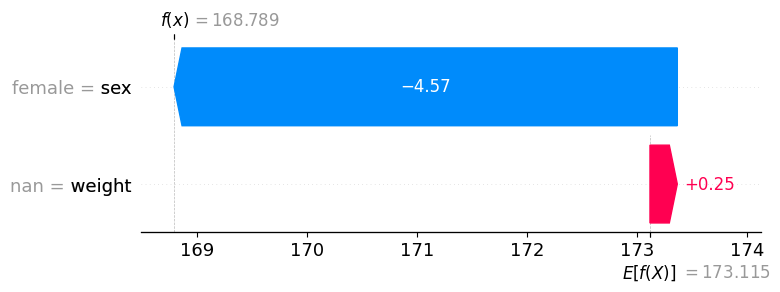

In [39]:
auto.explain_rows(
    train_data= df_train,
    model = predictr,
    rows=df_train.iloc[[208]],
    display_rows= True,
    plot='waterfall'
)

`-` 우리가 생각한 현실적인 적합은 사실 이러함

In [43]:
df_train[df_train.sex =='female'].weight.mean()

49.567060917121516

In [46]:
onerow = df_train.iloc[[211]].copy()
onerow.weight = 49.567060917121516
onerow

,weight,sex,height
211,49.567061,female,165.076235


In [47]:
predictr.predict(onerow)

211    164.488647
Name: height, dtype: float32

,weight,sex,height
211,49.567061,female,165.076235


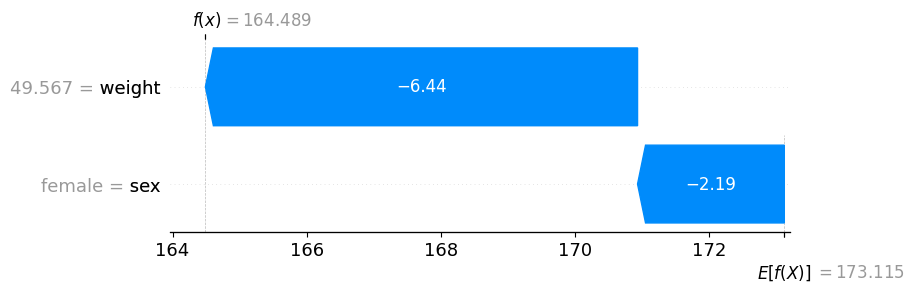

In [48]:
auto.explain_rows(
    train_data= df_train,
    model = predictr,
    rows=onerow,
    display_rows= True,
    plot='waterfall'
)

### 198번 obs

`-` 198번 observation

In [50]:
df_train.iloc[[198]]

,weight,sex,height
198,NaN,male,173.915293


In [49]:
predictr.predict(df_train.iloc[[198]])

198    178.869781
Name: height, dtype: float32

`-` 해석 

,weight,sex,height
198,NaN,male,173.915293


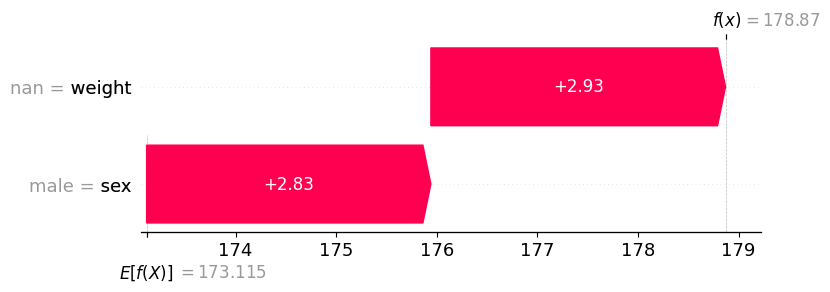

In [51]:
auto.explain_rows(
    train_data= df_train,
    model = predictr,
    rows=df_train.iloc[[198]],
    display_rows= True,
    plot='waterfall'
)